In [1]:
pwd

u'C:\\Users\\ndokku'

In [2]:
cd C:\Users\ndokku\Desktop\ECT-584 Final Project

C:\Users\ndokku\Desktop\ECT-584 Final Project


In [8]:
from IPython import display
# overwrite ipython defaults
plt.rcParams["figure.facecolor"] = '17344A'
plt.rcParams["axes.facecolor"] = '17344A'
plt.rcParams["figure.figsize"] = (10, 8)
import warnings
warnings.filterwarnings("ignore")

In [9]:
import json
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

In [10]:
import json
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline
from gensim import corpora, models
from nltk.corpus import stopwords
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.lda import LDA
from sklearn.qda import QDA
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
plt.rc('figure', figsize=(10,6))
sns.set()
colors = sns.color_palette()

Loading the data

types of data:
Yelp reviews, business information, users, tips, and check-ins

In [11]:
# Yelp_academic_datasets appear as a single JSON object per line in the file.
# Write the first line of the review file to look at the structure.
! head -n 1 yelp_academic_dataset_review.json

{"votes": {"funny": 0, "useful": 0, "cool": 0}, "user_id": "PUFPaY9KxDAcGqfsorJp3Q", "review_id": "Ya85v4eqdd6k9Od8HbQjyA", "stars": 4, "date": "2012-08-01", "text": "Mr Hoagie is an institution. Walking in, it does seem like a throwback to 30 years ago, old fashioned menu board, booths out of the 70s, and a large selection of food. Their speciality is the Italian Hoagie, and it is voted the best in the area year after year. I usually order the burger, while the patties are obviously cooked from frozen, all of the other ingredients are very fresh. Overall, its a good alternative to Subway, which is down the road.", "type": "review", "business_id": "5UmKMjUEUNdYWqANhGckJw"}


In [12]:
! head -n 1 yelp_academic_dataset_business.json

{"business_id": "5UmKMjUEUNdYWqANhGckJw", "full_address": "4734 Lebanon Church Rd\nDravosburg, PA 15034", "hours": {"Friday": {"close": "21:00", "open": "11:00"}, "Tuesday": {"close": "21:00", "open": "11:00"}, "Thursday": {"close": "21:00", "open": "11:00"}, "Wednesday": {"close": "21:00", "open": "11:00"}, "Monday": {"close": "21:00", "open": "11:00"}}, "open": true, "categories": ["Fast Food", "Restaurants"], "city": "Dravosburg", "review_count": 4, "name": "Mr Hoagie", "neighborhoods": [], "longitude": -79.9007057, "state": "PA", "stars": 4.5, "latitude": 40.3543266, "attributes": {"Take-out": true, "Drive-Thru": false, "Good For": {"dessert": false, "latenight": false, "lunch": false, "dinner": false, "brunch": false, "breakfast": false}, "Caters": false, "Noise Level": "average", "Takes Reservations": false, "Delivery": false, "Ambience": {"romantic": false, "intimate": false, "classy": false, "hipster": false, "divey": false, "touristy": false, "trendy": false, "upscale": false,

In [13]:
! head -n 1 yelp_academic_dataset_checkin.json

{"checkin_info": {"9-5": 1, "7-5": 1, "13-3": 1, "17-6": 1, "13-0": 1, "17-3": 1, "10-0": 1, "18-4": 1, "14-6": 1}, "type": "checkin", "business_id": "cE27W9VPgO88Qxe4ol6y_g"}


In [14]:
! head -n 1 yelp_academic_dataset_user.json

{"yelping_since": "2004-10", "votes": {"funny": 167, "useful": 280, "cool": 245}, "review_count": 108, "name": "Russel", "user_id": "18kPq7GPye-YQ3LyKyAZPw", "friends": ["rpOyqD_893cqmDAtJLbdog", "4U9kSBLuBDU391x6bxU-YA", "fHtTaujcyKvXglE33Z5yIw", "8J4IIYcqBlFch8T90N923A", "wy6l_zUo7SN0qrvNRWgySw", "HDQixQ-WZEV0LVPJlIGQeQ", "T4kuUr_iJiywOPdyM7gTHQ", "z_5D4XEIlGAPjG3Os9ix5A", "i63u3SdbrLsP4FxiSKP0Zw", "pnrGw4ciBXJ6U5QB2m0F5g", "ytjCBxosVSqCOQ62c4KAxg", "r5uiIxwJ-I-oHBkNY2Ha3Q", "niWoSKswEbooJC_M7HMbGw", "kwoxiKMyoYjB1wTCYAjYRg", "9A8OuP6XwLwnNb9ov3_Ncw", "27MmRg8LfbZXNEHkEnKSdA", "Bn4sJUTtKFZQt0FKHF2Adw", "uguXfIEpI65jSCH5MgUDgA", "6VZNGc2h2Bn-uyuEXgOt5g", "AZ8CTtwr-4sGM2kZqF6qig", "S742m-AuQicMSLDdErrLZQ", "uGmQ6ab4iVpWn5m61VFhkQ", "GJYJX4SujVj3BR8v2F9PDQ", "3shjifK-vZkIHciyy_KbYA", "4lc_H2Cf7CO0tCgyA3aSVQ", "Tunkp_F1R_uFBJQTsDxD4g", "B9pKfr27czBbCoAIircZdQ", "pePGMO6EbDpbaZ7D2m6HIg", "XRM8W6HUoXbrYKR3BCj9Rg", "8DqIWXsKXOipfduYEfFpNw", "dvRVX54Z9f7Om51NsTRX1w", "CM0saLQmk4oAB17UmQTV-g"

In [15]:
! head -n 1 yelp_academic_dataset_tip.json

{"user_id": "-6rEfobYjMxpUWLNxszaxQ", "text": "Don't waste your time.", "business_id": "cE27W9VPgO88Qxe4ol6y_g", "likes": 0, "date": "2013-04-18", "type": "tip"}


The reviews dataset
This is the dataset that includes the actual text reviews and the star ratings 

In [16]:
reviews = [json.loads(line) for line in open('yelp_academic_dataset_review.json')]
len(reviews)

2225213

In [17]:
# convert to pandas data frame
reviews = DataFrame(reviews)
reviews.shape

(2225213, 8)

In [24]:
reviews.head()

,business_id,date,review_id,stars,text,type,user_id,votes
0,5UmKMjUEUNdYWqANhGckJw,2012-08-01,Ya85v4eqdd6k9Od8HbQjyA,4,"Mr Hoagie is an institution. Walking in, it do...",review,PUFPaY9KxDAcGqfsorJp3Q,"{u'funny': 0, u'useful': 0, u'cool': 0}"
1,5UmKMjUEUNdYWqANhGckJw,2014-02-13,KPvLNJ21_4wbYNctrOwWdQ,5,Excellent food. Superb customer service. I mis...,review,Iu6AxdBYGR4A0wspR9BYHA,"{u'funny': 0, u'useful': 0, u'cool': 0}"
2,5UmKMjUEUNdYWqANhGckJw,2015-10-31,fFSoGV46Yxuwbr3fHNuZig,5,Yes this place is a little out dated and not o...,review,auESFwWvW42h6alXgFxAXQ,"{u'funny': 0, u'useful': 0, u'cool': 0}"
3,UsFtqoBl7naz8AVUBZMjQQ,2013-11-08,Di3exaUCFNw1V4kSNW5pgA,5,All the food is great here. But the best thing...,review,uK8tzraOp4M5u3uYrqIBXg,"{u'funny': 0, u'useful': 0, u'cool': 0}"
4,UsFtqoBl7naz8AVUBZMjQQ,2014-03-29,0Lua2-PbqEQMjD9r89-asw,3,We checked this place out this past Monday for...,review,I_47G-R2_egp7ME5u_ltew,"{u'funny': 0, u'useful': 0, u'cool': 0}"


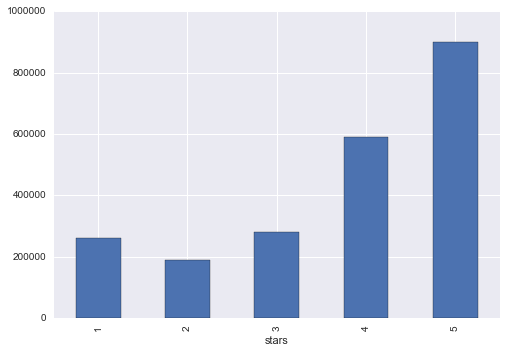

In [25]:
# analyze distribution of the stars
reviews.groupby('stars').size().plot(kind = 'bar')

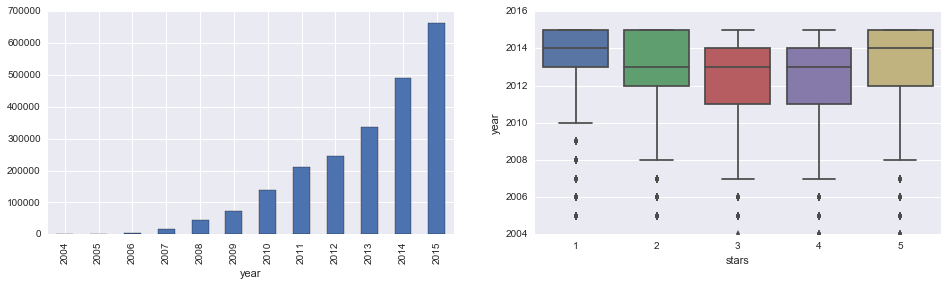

In [26]:
# analyze the number of reviews and ratings per year
reviews['date'] = pd.to_datetime(reviews['date'])
reviews['year'] = [d.year for d in reviews['date']]

fig, axs = plt.subplots(1, 2)
reviews.groupby('year').size().plot(kind = 'bar', ax = axs[0], figsize = (16, 4))
sns.boxplot(reviews['stars'], reviews['year'], ax = axs[1])

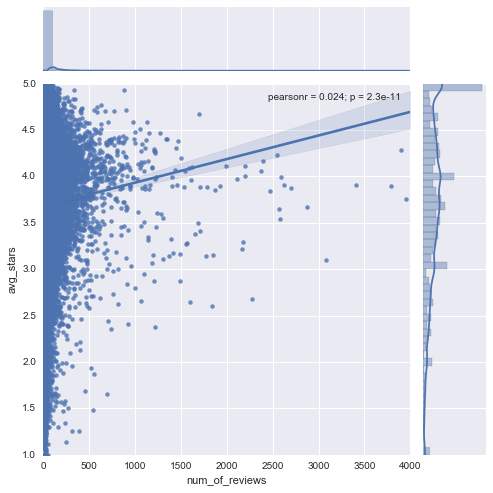

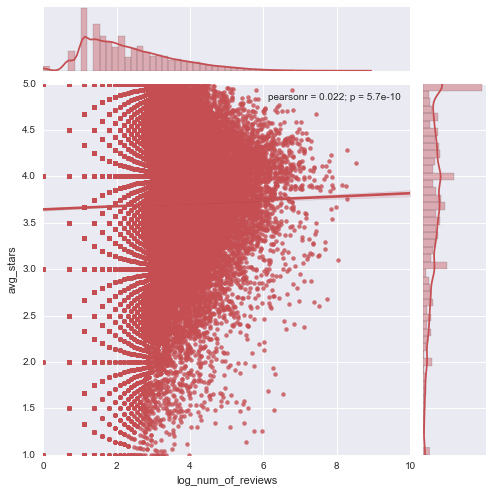

In [27]:
star_by_review_count = reviews.groupby('business_id')['stars'].agg({'num_of_reviews': len, 'avg_stars': np.mean})
star_by_review_count['log_num_of_reviews'] = np.log(star_by_review_count['num_of_reviews'])

sns.jointplot('num_of_reviews', 'avg_stars', star_by_review_count, kind = 'reg', xlim = (0, 4000), ylim = (1, 5),
              color = sns.color_palette()[0], size = 7)
sns.jointplot('log_num_of_reviews', 'avg_stars', star_by_review_count, kind = 'reg', xlim = (0, 10), ylim = (1, 5),
              color = sns.color_palette()[2], size = 7)

There seems to be an upward trend using the raw review count, but there is too much noise in the lower end to apply it reliably. But When applying the log transformation, the trend disappears.

The business dataset

In [28]:
business = [json.loads(line) for line in open('yelp_academic_dataset_business.json')]
len(business)

77445

In [29]:
business = DataFrame(business)
business.shape

(77445, 15)

In [30]:
business.head()

,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type
0,"{u'Take-out': True, u'Drive-Thru': False, u'Ou...",5UmKMjUEUNdYWqANhGckJw,"[Fast Food, Restaurants]",Dravosburg,"4734 Lebanon Church Rd\nDravosburg, PA 15034","{u'Tuesday': {u'close': u'21:00', u'open': u'1...",40.354327,-79.900706,Mr Hoagie,[],True,4,4.5,PA,business
1,"{u'Happy Hour': True, u'Accepts Credit Cards':...",UsFtqoBl7naz8AVUBZMjQQ,[Nightlife],Dravosburg,"202 McClure St\nDravosburg, PA 15034",{},40.350553,-79.886814,Clancy's Pub,[],True,4,3.5,PA,business
2,{},3eu6MEFlq2Dg7bQh8QbdOg,"[Auto Repair, Automotive]",Dravosburg,"1 Ravine St\nDravosburg, PA 15034",{},40.350956,-79.889059,Joe Cislo's Auto,[],True,3,5.0,PA,business
3,{u'Good for Kids': True},cE27W9VPgO88Qxe4ol6y_g,"[Active Life, Mini Golf, Golf]",Bethel Park,"1530 Hamilton Rd\nBethel Park, PA 15234",{},40.354115,-80.014660,Cool Springs Golf Center,[],False,5,2.5,PA,business
4,"{u'Accepts Credit Cards': False, u'Price Range...",HZdLhv6COCleJMo7nPl-RA,"[Shopping, Home Services, Internet Service Pro...",Pittsburgh,"301 South Hills Village\nPittsburgh, PA 15241","{u'Monday': {u'close': u'21:00', u'open': u'10...",40.357620,-80.059980,Verizon,[],True,5,2.5,PA,business


comparing the Business IDs from the two dataframes

In [31]:
print 'the number of unique business_ids from the reviews dataset:', len(set(reviews['business_id']))
print 'the number of unique business_ids from the business dataset:', len(business)

the number of unique business_ids from the reviews dataset: 77079
the number of unique business_ids from the business dataset: 77445


In [32]:
print 'the number of business_ids the two datasets have in common:', len(set(reviews['business_id']) & set(business['business_id']))

the number of business_ids the two datasets have in common: 77079


In [33]:
category_len = [len(c) for c in business['categories']]
print 'the number of blank business categories:', sum(np.array(category_len) == 0)

the number of blank business categories: 260


In [34]:
bid_0 = business['business_id'][np.array(category_len) == 0]
print 'the number of "blank" business listings included in the reviews dataset:', len(set(bid_0) & set(reviews['business_id']))

the number of "blank" business listings included in the reviews dataset: 258


In [35]:
for cat in business['categories'][np.array(category_len) == 0]:
    cat.append('NA')

In [36]:
# count the frequencies of all categories
categories_all = sum(business['categories'], [])
categories_all_count = pd.value_counts(categories_all)

# for each business listing, find the category description that is most common to all
categories = business['categories']
categories_count = [[categories_all_count[c] for c in category] for category in categories]

most_common_ix = [np.argmax(counts) for counts in categories_count]
most_common_categories = [categories[i][most_common_ix[i]] for i in xrange(len(categories))]

# count again
pd.value_counts(most_common_categories)

Restaurants                     25071
Shopping                        11206
Food                             6443
Beauty & Spas                    5827
Home Services                    4464
Health & Medical                 4362
Automotive                       3838
Active Life                      2680
Local Services                   2661
Nightlife                        2396
Event Planning & Services        2281
Pets                             1452
Arts & Entertainment             1114
Hotels & Travel                   926
Financial Services                684
Professional Services             533
Education                         435
Public Services & Government      380
NA                                260
Religious Organizations           211
Local Flavor                      125
Mass Media                         96
dtype: int64

In [37]:
# better, but there's still categories that can be grouped together (based on subjective reviews)
category_map = {'Food': 'Restaurants', 'Local Flavor': 'Arts & Entertainment', 'Mass Media': 'Arts & Entertainment'}
most_common_categories = [category_map[category] if category in category_map else category
                          for category in most_common_categories]
business['category'] = most_common_categories

In [38]:
business['price'] = [attr['Price Range'] if 'Price Range' in attr else np.nan for attr in business['attributes']]

In [39]:
business['state'] = [state if state in ['AZ', 'NV', 'WI', 'ON', 'EDH'] else 'Others'
                     for state in business['state']]

In [40]:
# select fields to save
business = business[['business_id', 'category', 'price', 'state']]
business.to_pickle('business.pkl')

Merge reviews and business datasets

In [41]:
reviews = pd.merge(reviews, business, how = 'left', on = 'business_id')

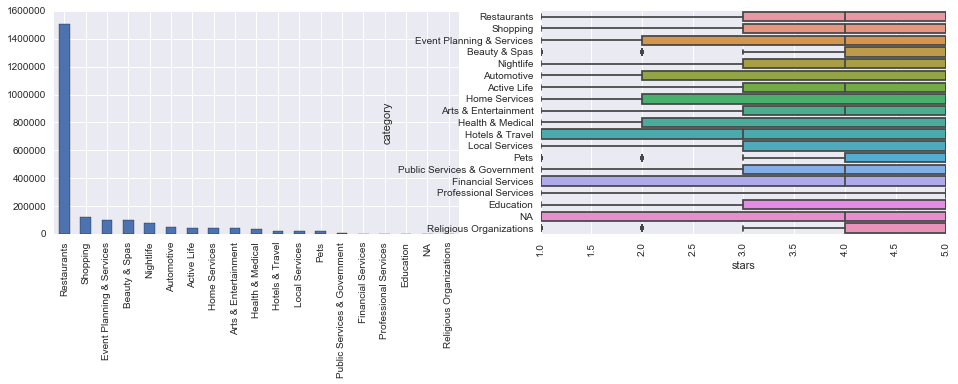

In [42]:
# analyze the number of reviews and ratings per category
fig, axs = plt.subplots(1, 2)
pd.value_counts(reviews['category']).plot(kind = 'bar', ax = axs[0], figsize = (16, 4))
sns.boxplot(reviews['stars'], reviews['category'], order = pd.value_counts(reviews['category']).index, ax = axs[1])

# rotate labels for the boxplot
for tick in axs[1].xaxis.get_major_ticks():
    tick.label.set_rotation('vertical')

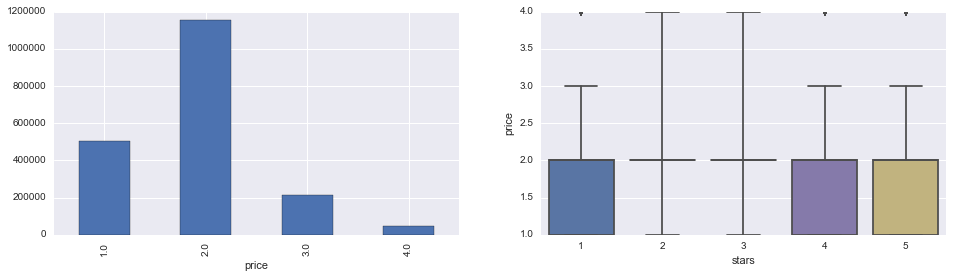

In [43]:
# analyze the number of reviews and ratings per price level
fig, axs = plt.subplots(1, 2)
reviews.groupby('price').size().plot(kind = 'bar', ax = axs[0], figsize = (16, 4))
sns.boxplot(reviews['stars'], reviews['price'], ax = axs[1])

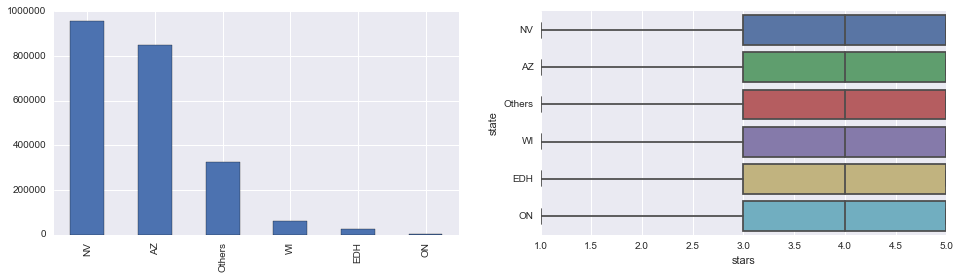

In [44]:
# finally, the number of reviews and ratings per state
fig, axs = plt.subplots(1, 2)
pd.value_counts(reviews['state']).plot(kind = 'bar', ax = axs[0], figsize = (16, 4))
sns.boxplot(reviews['stars'], reviews['state'], order = pd.value_counts(reviews['state']).index, ax = axs[1])

In [45]:
import json
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline
from gensim import corpora, models
from nltk.corpus import stopwords
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.lda import LDA
from sklearn.qda import QDA
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
plt.rc('figure', figsize=(10,6))
sns.set()
colors = sns.color_palette()

In [46]:
import optparse
import collections
import csv
import simplejson as json

In [47]:
# Converting the Yelp Dataset from json format to csv.

In [75]:
def readFile(path):
     """Read in the json dataset file and return a list of python dicts."""
     file_records = []
     column_names = set()
     with open(path) as fin:
         for line in fin:
             line_records = json.loads(line)
             column_names.update(
                     set(get_column_names(line_records).keys())
                     )
             file_records.append(line_records)
     return file_records, column_names

def get_column_names(line_records, parent_key=''):
     column_names = []
     for k, v in line_records.iteritems():
         column_name = "{0}.{1}".format(parent_key, k) if parent_key else k
         if isinstance(v, collections.MutableMapping):
             column_names.extend(
                     get_column_names(v, column_name).items()
                     )
         else:
             column_names.append((column_name, v))
     return dict(column_names)

def get_nested_value(d, key):
     if '.' not in key:
         if key not in d:
             return None
         return d[key]
     base_key, sub_key = key.split('.', 1)
     if base_key not in d:
         return None
     sub_dict = d[base_key]
     return get_nested_value(sub_dict, sub_key)

def get_row(line_records, column_names):
    """Return a csv compatible row given column names and a dict."""
     row = []
     for column_name in column_names:
        line_value = get_nested_value(
                         line_records,
                         column_name,
                         )
         if isinstance(line_value, unicode):
             row.append('{0}'.format(line_value.encode('utf-8')))
         elif line_value is not None:
             row.append('{0}'.format(line_value))
         else:
             row.append('')
     return row

def writeFile(path, file_records, column_names):
     """Create and write a csv file given file_contents of our json dataset file and column names."""
     csv_file = csv.writer(open('path', 'wb+'))
     with open(path, 'wb+') as fin:
         csv_file = csv.writer(fin)
         csv_file.writerow(list(column_names))
         for line_records in file_records:
             csv_file.writerow(get_row(line_records, column_names))

In [78]:
file_records, column_names = readFile('yelp_academic_dataset_business.json')
writeFile('yelp_academic_dataset_business.csv', file_records, column_names)

file_records, column_names = readFile('yelp_academic_dataset_checkin.json')
writeFile('yelp_academic_dataset_checkin.csv', file_records, column_names)

file_records, column_names = readFile('yelp_academic_dataset_review.json')
writeFile('yelp_academic_dataset_review.csv', file_records, column_names)

file_records, column_names = readFile('yelp_academic_dataset_tip.json')
writeFile('yelp_academic_dataset_tip.csv', file_records, column_names)

file_records, column_names = readFile('yelp_academic_dataset_user.json')
writeFile('yelp_academic_dataset_user.csv', file_records, column_names)

In [79]:
%reset out

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
Flushing output cache (0 entries)


In [80]:
#Reading the csv files using pandas. Then merging and cleaning the datasets.

In [81]:
bussiness = pd.read_csv('yelp_academic_dataset_business.csv', dtype=unicode)
checkin = pd.read_csv('yelp_academic_dataset_checkin.csv')
review = pd.read_csv('yelp_academic_dataset_review.csv')
tip = pd.read_csv('yelp_academic_dataset_tip.csv')
user = pd.read_csv('yelp_academic_dataset_user.csv')

In [82]:
#Merging dataframes

In [83]:
reviewUser = review.merge(user,left_on='user_id',right_on='user_id',how='outer',suffixes=('_review', '_user'))

In [84]:
businessReviewUser = reviewUser.merge(bussiness,left_on='business_id',right_on='business_id',how='outer',
                                                   suffixes=('_reviewuser', '_business'))

In [85]:
businessReviewUser[:0]

,user_id,review_id,text,votes.cool_review,business_id,votes.funny_review,stars_reviewuser,date,type_review,votes.useful_review,...,attributes.Noise Level,attributes.Smoking,attributes.Attire,attributes.Hair Types Specialized In.curly,attributes.Good For Groups,neighborhoods,attributes.Open 24 Hours,attributes.Ambience.romantic,attributes.Music.jukebox,attributes.Ambience.upscale


In [86]:
#rename columns in merge dataframe

In [87]:
businessReviewUser = businessReviewUser.rename(columns = {'name_reviewuser':'name_user',
                                                                        'review_count_reviewuser':'review_count_user',
                                                                        'stars_reviewuser':'stars_review'})

In [88]:
businessReviewUser.filter(regex="[Kk]ids").dropna(how='all').head()

,attributes.Hair Types Specialized In.kids,attributes.Good for Kids
0,NaN,True
1,NaN,True
2,NaN,True
6,NaN,True
7,NaN,True


In [89]:
#Removing spaces from column names and replacing them with underscores.

In [90]:
cols = businessReviewUser.columns
cols = cols.map(lambda x: x.replace(' ', '_').lower() if isinstance(x, (str, unicode)) else x)
businessReviewUser.columns = cols

In [91]:

firstFewRows = businessReviewUser.ix[:,['categories','text','stars_review']].head(100000)
firstFewRowsList = firstFewRows['categories'].tolist()
restaurantsDF = firstFewRows[firstFewRows['categories'].str.contains('Restaurants')]

In [92]:
businessReviewUser.ix[:, ["date",
                                 "user_name",
                                 "stars_business",
                                 "attributes.takes_reservations",
                                 "stars_review",
                                 "hours.monday.open",
                                 "name_business",
                                 "categories",
                                 "latitude",
                                 "longitude",
                                 "city",
                                 "votes.cool_user",
                                 "votes.funny_user",
                                 "votes.useful_user",
                                 "text",
                                 "votes.cool_review",
                                 "votes.funny_review",
                                 "votes.useful_review",
                                 "review_count_business"]].head()

,date,user_name,stars_business,attributes.takes_reservations,stars_review,hours.monday.open,name_business,categories,latitude,longitude,city,votes.cool_user,votes.funny_user,votes.useful_user,text,votes.cool_review,votes.funny_review,votes.useful_review,review_count_business
0,2012-08-01,NaN,4.5,False,4.0,11:00,Mr Hoagie,"['Fast Food', 'Restaurants']",40.3543266,-79.9007057,Dravosburg,12.0,25.0,166.0,"Mr Hoagie is an institution. Walking in, it do...",0.0,0.0,0.0,4
1,2014-02-13,NaN,4.5,False,5.0,11:00,Mr Hoagie,"['Fast Food', 'Restaurants']",40.3543266,-79.9007057,Dravosburg,0.0,0.0,1.0,Excellent food. Superb customer service. I mis...,0.0,0.0,0.0,4
2,2015-10-31,NaN,4.5,False,5.0,11:00,Mr Hoagie,"['Fast Food', 'Restaurants']",40.3543266,-79.9007057,Dravosburg,0.0,2.0,2.0,Yes this place is a little out dated and not o...,0.0,0.0,0.0,4
3,2012-08-01,NaN,3.0,NaN,3.0,NaN,Shop 'n Save,"['Food', 'Grocery']",40.3736775,-79.8737336,West Mifflin,12.0,25.0,166.0,It is now a shop and save.,0.0,0.0,0.0,3
4,2014-07-26,NaN,3.0,NaN,3.0,NaN,Shop 'n Save,"['Food', 'Grocery']",40.3736775,-79.8737336,West Mifflin,27.0,9.0,52.0,living alone I love the 5 for $20 deals they h...,0.0,0.0,0.0,3


In [93]:
for column in businessReviewUser.columns:
    if 'attributes' in column:
        print '%55s'%column, '\t',businessReviewUser[column].unique()

                              attributes.ambience.divey 	['False' nan 'True']
                  attributes.dietary_restrictions.vegan 	[nan 'False' 'True']
                                  attributes.happy_hour 	[nan 'True' 'False']
                            attributes.order_at_counter 	[nan 'False' 'True']
   attributes.hair_types_specialized_in.africanamerican 	[nan 'True' 'False']
              attributes.hair_types_specialized_in.kids 	[nan 'False' 'True']
                                        attributes.byob 	[nan 'True' 'False']
                          attributes.good_for.latenight 	['False' nan 'True']
                             attributes.outdoor_seating 	['False' nan 'True']
                                     attributes.alcohol 	['none' nan 'beer_and_wine' 'full_bar']
                             attributes.ambience.classy 	['False' nan 'True']
                         attributes.by_appointment_only 	[nan 'False' 'True']
                                 attributes.p

In [94]:
def plotStarsHistogram(colName):
    fullDF = businessReviewUser.ix[:,[colName,'stars_review']].head(100000)
    trueDF = fullDF[fullDF[colName].isin(['True'])]
    falseDF = fullDF[fullDF[colName].isin(['False'])]
    fig, axs = plt.subplots()
    axs.set_title(colName)
    axs.set_xlabel('Rating in Stars')
    axs.set_ylabel('Normalized Frequency')
    bins = 5
    n, bins, patches = axs.hist([trueDF['stars_review'],falseDF['stars_review']], bins, histtype='bar',  color=['blue','green'], 
                                label=['True','False'],rwidth=0.7)
    leg = axs.legend(loc='upper left')
    plt.show()

In [95]:
def calculateCorrelation(colName):
    fullDF = businessReviewUser.ix[:,[colName,'stars_review']].head(100000)
    trueDF = fullDF[fullDF[colName].isin(['True'])]
    falseDF = fullDF[fullDF[colName].isin(['False'])]
    positiveRating = 4
    trueHigh = len(trueDF[trueDF['stars_review'] >= positiveRating])
    trueLow = len(trueDF[trueDF['stars_review'] < positiveRating])
    falseHigh = len(falseDF[falseDF['stars_review'] >= positiveRating])
    falseLow = len(falseDF[falseDF['stars_review'] < positiveRating])
    #print (trueHigh+falseLow)
    totalSamples = trueHigh+trueLow+falseHigh+falseLow
    print "Statistics for Column",colName
    print "Total number of Samples are", totalSamples
    print "Total number of True-High Samples are", trueHigh
    print "Total number of True-Low Samples are", trueLow
    print "Total number of False-High Samples are", falseHigh
    print "Total number of False-Low Samples are", falseLow
    print "Percentage correlation between:",colName,"and review stars is",100*(trueHigh+falseLow)/totalSamples,"%"
    print "-------------------------------------------------------"

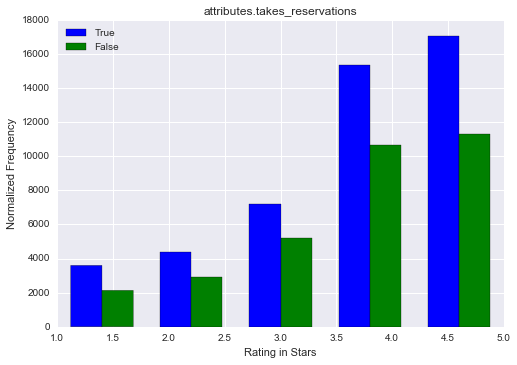

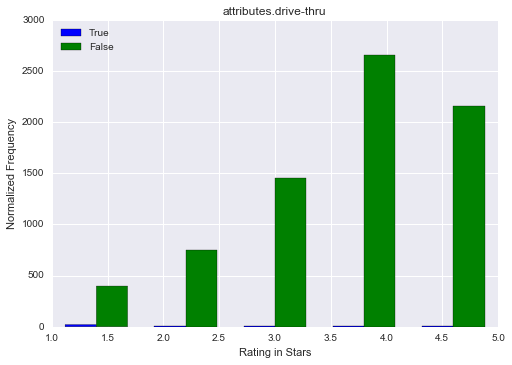

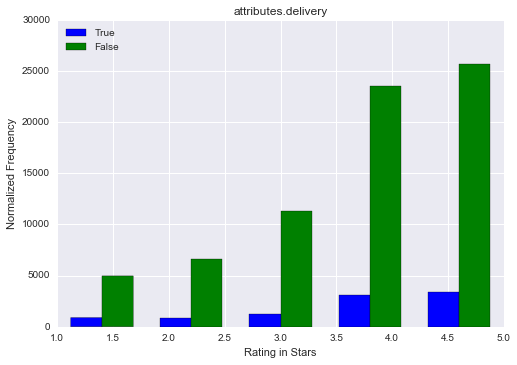

In [96]:
plotStarsHistogram('attributes.takes_reservations')
plotStarsHistogram('attributes.drive-thru')
plotStarsHistogram('attributes.delivery')

In [97]:
for column in businessReviewUser.columns:
    if 'attributes' in column and 'True' in businessReviewUser[column].unique():
        calculateCorrelation(column)

Statistics for Column attributes.ambience.divey
Total number of Samples are 81569
Total number of True-High Samples are 4690
Total number of True-Low Samples are 1903
Total number of False-High Samples are 50503
Total number of False-Low Samples are 24473
Percentage correlation between: attributes.ambience.divey and review stars is 35 %
-------------------------------------------------------
Statistics for Column attributes.dietary_restrictions.vegan
Total number of Samples are 164
Total number of True-High Samples are 0
Total number of True-Low Samples are 0
Total number of False-High Samples are 82
Total number of False-Low Samples are 82
Percentage correlation between: attributes.dietary_restrictions.vegan and review stars is 50 %
-------------------------------------------------------
Statistics for Column attributes.happy_hour
Total number of Samples are 22709
Total number of True-High Samples are 12167
Total number of True-Low Samples are 6102
Total number of False-High Samples a

In [98]:
restaurant_cat= restaurantsDF.groupby(['categories']).count()
restaurant_tsr = restaurantsDF[['text','stars_review']]

In [99]:
#restaurant_cat
#restaurant_tsr

In [102]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


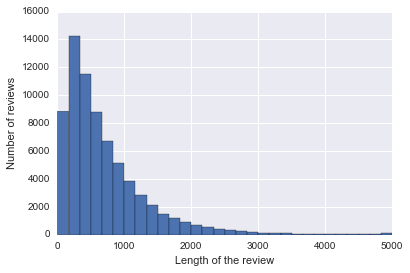

In [103]:
restaurantsDF.text.dropna().str.len().hist(bins=30)
xlabel('Length of the review')
ylabel('Number of reviews')

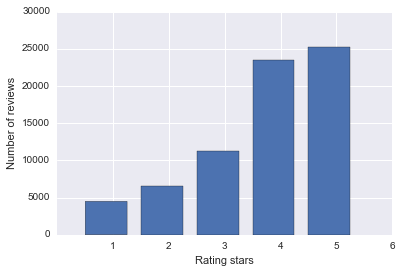

In [104]:
bins = [1, 2,3 ,4, 5, 6]
restaurantsDF.stars_review.hist(bins=bins, align='left', width=0.75)
xticks(bins)
xlabel('Rating stars')
ylabel('Number of reviews')
plt.show()

In [105]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Initial Model Assign average rating as the predicted rating.

In [106]:
restaurantsDF['predicted_rating'] = round(sum(restaurantsDF.stars_review)/len(restaurantsDF.index))
restaurantsDF['predicted_rating'] = round(sum(restaurantsDF.stars_review)/len(restaurantsDF.index))

print "Initial Model Rating:", round(sum(restaurantsDF.stars_review)/len(restaurantsDF.index))

Initial Model Rating: 4.0


In [107]:
m1 = restaurantsDF[['stars_review', 'predicted_rating']].dropna(how='any')

In [108]:
precision = metrics.precision_score(m1.stars_review, m1.predicted_rating)
recall = metrics.recall_score(m1.stars_review, m1.predicted_rating)
f1 = metrics.f1_score(m1.stars_review, m1.predicted_rating)
accuracy = accuracy_score(m1.stars_review, m1.predicted_rating)

InitialResult = {}

data = {'precision':precision,
        'recall':recall,
        'f1_score':f1,
        'accuracy':accuracy}

InitialResult['Initial Model'] = data
pd.DataFrame(InitialResult).T

,accuracy,f1_score,precision,recall
Initial Model,0.331256,0.164853,0.10973,0.331256


In [109]:
def central_tendency_plot(point, ci, y, color, label):
    plt.plot(ci, [y, y], "-", color=color, linewidth=6, label=label)
    plt.plot(point, y, "o", color=color, markersize=10)
    
def plot_error_dist(column, name):
    d = column.tolist()
    d = [0 if math.isnan(x) else x for x in d]
    m = mean(d)
    med = median(d)
    s = std(d)

    x = linspace(min(d), max(d), 1000)
    gauss = lambda x, m, s: (1 / (s * sqrt(2 * pi)) * exp(-0.5 * ((x - m) / s) ** 2))
    y = gauss(x, m, s)

    bins = np.arange(min(d), max(d)+1, 1)
    n, b, patches = plt.hist(d, bins=bins+1, normed=True,facecolor='lightblue', align='left', width=0.75)
    xticks(bins)
    bin_max = np.max(n)
    m_y = bin_max/5
    
    central_tendency_plot(m, [m - s, m + s], m_y, colors[1], "std dev")

    ci = np.percentile(d, [16, 84])
    central_tendency_plot(med, ci,  m_y - bin_max/10, colors[4], "68% CI")
    
    plt.legend(loc=0)
    plt.plot(x, y, color=colors[2])
    plt.xlabel('Error')
    plt.ylabel('Normalized Frequency')
    title = name + ' Error Distribution'
    plt.title(title)
    plt.show()

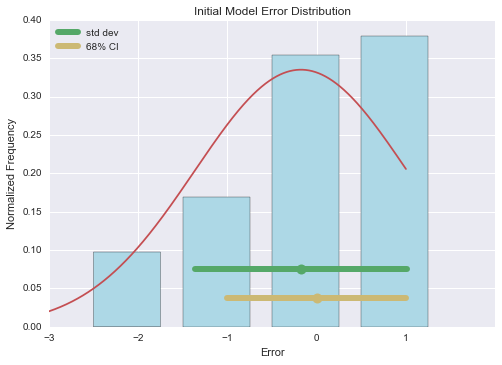

In [112]:
error = restaurantsDF.stars_review - restaurantsDF.predicted_rating
plot_error_dist(error, "Initial Model")

Preparing data

Obtain the list of all stop words

In [113]:
stop = set(stopwords.words("english"))

In [114]:
numTopics = 15

In [115]:
m2 = restaurantsDF.dropna(how='all')

In [116]:
minReviewLen = 100
maxReviewLen = 500

print "Number of rows selected:",len(m2[m2.text.str.len() > minReviewLen][m2.text.str.len() < maxReviewLen])
restaurantsDF = m2[m2.text.str.len() > minReviewLen][m2.text.str.len() < maxReviewLen]

Number of rows selected: 31192


In [117]:
def perform_lda(allReviewsTrain, numTopics):
    corpus = []
    for review in allReviewsTrain:
        # Remove punctuations
        review = re.sub(r'[^a-zA-Z]', ' ', review)
        # To lowercase
        review = review.lower()
        # Remove stop words
        texts = [word for word in review.lower().split() if word not in stop]
        try:
            corpus.append(texts)
        except:
            pass

    # Build dictionary
    dictionary = corpora.Dictionary(corpus)
    dictionary.save('restaurant_reviews.dict')
        
    # Build vectorized corpus
    corpus_2 = [dictionary.doc2bow(text) for text in corpus]
    #corpora.MmCorpus.serialize('LDA/restaurant_reviews.mm', corpus_2)
    
    lda = models.LdaModel(corpus_2, num_topics=numTopics, id2word=dictionary)
    return lda

In [118]:
def process_reviews(dirty_data_set):
    clean_data_set = []
    for review in dirty_data_set:
        # Remove punctuations
        review = re.sub(r'[^a-zA-Z]', ' ', review)
        # To lowercase
        review = review.lower()
        # Remove stop words
        texts = [word for word in review.lower().split() if word not in stop]
        try:
            clean_data_set.append(' '.join(texts))
        except:
            pass
    return clean_data_set

# Generates a matrix of topic probabilities for each document in matrix
# Returns topic_dist for the input corpus, and all_dist, a running sum of all the corpuses
def generate_topic_dist_matrix(lda, numTopics, corpus, all_dist, star):
    topic_dist = [0] * numTopics
    dictionary = corpora.Dictionary.load("restaurant_reviews.dict")
    for doc in corpus:
        vec = dictionary.doc2bow(doc.lower().split())
        output = lda[vec]
        highest_prob = 0
        highest_topic = 0
        temp = [0] * numTopics    # List to keep track of topic distribution for each document
        for topic in output:
            this_topic, this_prob = topic
            temp[this_topic] = this_prob
            if this_prob > highest_prob:
                highest_prob = this_prob 
                highest_topic = this_topic
        temp.append(star)
        all_dist.append(temp)
        topic_dist[highest_topic] += 1
    return topic_dist, all_dist

In [119]:
SG = restaurantsDF.groupby('stars_review')

In [122]:
star1 = SG.get_group(1.0)['text']
star2 = SG.get_group(2.0)['text']
star3 = SG.get_group(3.0)['text']
star4 = SG.get_group(4.0)['text']
star5 = SG.get_group(5.0)['text']

In [123]:
star1_labels = [1.0]*len(star1)
star2_labels = [2.0]*len(star2)
star3_labels = [3.0]*len(star3)
star4_labels = [4.0]*len(star4)
star5_labels = [5.0]*len(star5)

Spliting into training and testing data randomly using sklearn's library

In [124]:
from sklearn.cross_validation import train_test_split

star1_train,star1_test,stars1_labels_train,star1_labels_test=train_test_split(star1, star1_labels, test_size=0.20)
star2_train,star2_test,stars2_labels_train,star2_labels_test=train_test_split(star2, star2_labels, test_size=0.20)
star3_train,star3_test,stars3_labels_train,star3_labels_test=train_test_split(star3, star3_labels, test_size=0.20)
star4_train,star4_test,stars4_labels_train,star4_labels_test=train_test_split(star4, star4_labels, test_size=0.20)
star5_train,star5_test,stars5_labels_train,star5_labels_test=train_test_split(star5, star5_labels, test_size=0.20)

In [125]:
# Process the reviews
corpus_1stars = process_reviews(star1_train)
corpus_2stars = process_reviews(star2_train)
corpus_3stars = process_reviews(star3_train)
corpus_4stars = process_reviews(star4_train)
corpus_5stars = process_reviews(star5_train)

print "Number of 5-star reviews after processing: ", len(corpus_5stars)
print "Number of 4-star reviews after processing: ", len(corpus_4stars)
print "Number of 3-star reviews after processing: ", len(corpus_3stars)
print "Number of 2-star reviews after processing: ", len(corpus_2stars)
print "Number of 1-star reviews after processing: ", len(corpus_1stars)

Number of 5-star reviews after processing:  10184
Number of 4-star reviews after processing:  7988
Number of 3-star reviews after processing:  3374
Number of 2-star reviews after processing:  1849
Number of 1-star reviews after processing:  1556


In [126]:
star_5_4_train = np.append(corpus_5stars, corpus_4stars)
star_5_4_3_train = np.append(star_5_4_train, corpus_3stars)
star_5_4_3_2_train = np.append(star_5_4_3_train, corpus_2stars)
star_train = np.append(star_5_4_3_2_train, corpus_1stars)

In [127]:
%time lda = perform_lda(star_train, numTopics)

Wall time: 26.5 s


Building the final dataframe containing topic distribution

In [128]:
topic_dist_list = []

# Keep a separate list to count topics
topic_dist_star1 = []
topic_dist_star2 = []
topic_dist_star3 = []
topic_dist_star4 = []
topic_dist_star5 = []

topic_dist_5stars, topic_dist_list = generate_topic_dist_matrix(lda, numTopics, corpus_5stars, topic_dist_list, 5)
topic_dist_4stars, topic_dist_list = generate_topic_dist_matrix(lda, numTopics, corpus_4stars, topic_dist_list, 4)
topic_dist_3stars, topic_dist_list = generate_topic_dist_matrix(lda, numTopics, corpus_3stars, topic_dist_list, 3)
topic_dist_2stars, topic_dist_list = generate_topic_dist_matrix(lda, numTopics, corpus_2stars, topic_dist_list, 2)
topic_dist_1stars, topic_dist_list = generate_topic_dist_matrix(lda, numTopics, corpus_1stars, topic_dist_list, 1)

cols = []
for i in xrange(1, numTopics+1):
    cols.append("Topic"+ str(i))
cols.append("Star")

topicDist_allStars_train = pd.DataFrame(topic_dist_list, columns=cols)

Preparing test data for topic distribution.

In [129]:
# Process the test reviews
corpus_5stars = process_reviews(star5_test)
corpus_4stars = process_reviews(star4_test)
corpus_3stars = process_reviews(star3_test)
corpus_2stars = process_reviews(star2_test)
corpus_1stars = process_reviews(star1_test)

print "Number of 5-star test reviews after processing: ", len(corpus_5stars)
print "Number of 4-star test reviews after processing: ", len(corpus_4stars)
print "Number of 3-star test reviews after processing: ", len(corpus_3stars)
print "Number of 2-star test reviews after processing: ", len(corpus_2stars)
print "Number of 1-star test reviews after processing: ", len(corpus_1stars)

Number of 5-star test reviews after processing:  2547
Number of 4-star test reviews after processing:  1997
Number of 3-star test reviews after processing:  844
Number of 2-star test reviews after processing:  463
Number of 1-star test reviews after processing:  390


In [130]:
star_5_4_test = np.append(corpus_5stars, corpus_4stars)
star_5_4_3_test = np.append(star_5_4_test, corpus_3stars)
star_5_4_3_2_test = np.append(star_5_4_3_test, corpus_2stars)
star_test = np.append(star_5_4_3_2_test, corpus_1stars)

In [131]:
topic_dist_list = []

# Keep a separate list to count topics
topic_dist_5stars = []
topic_dist_4stars = []
topic_dist_3stars = []
topic_dist_2stars = []
topic_dist_1stars = []


topic_dist_5stars, topic_dist_list = generate_topic_dist_matrix(lda, numTopics, corpus_5stars, topic_dist_list, 5)
topic_dist_4stars, topic_dist_list = generate_topic_dist_matrix(lda, numTopics, corpus_4stars, topic_dist_list, 4)
topic_dist_3stars, topic_dist_list = generate_topic_dist_matrix(lda, numTopics, corpus_3stars, topic_dist_list, 3)
topic_dist_2stars, topic_dist_list = generate_topic_dist_matrix(lda, numTopics, corpus_2stars, topic_dist_list, 2)
topic_dist_1stars, topic_dist_list = generate_topic_dist_matrix(lda, numTopics, corpus_1stars, topic_dist_list, 1)

cols = []
for i in xrange(1, numTopics+1):
    cols.append("Topic"+ str(i))
cols.append("Star")

topicDist_allStars_test = pd.DataFrame(topic_dist_list, columns=cols)


In [134]:
topicDist_allStars_train.shape

(24951, 16)

In [135]:
topicDist_allStars_test.shape

(6241, 16)

In [145]:
def getSentiment(x):
    if x < 3.5:
        return 0
    else:
        return 1

In [146]:
topicDist_allStars_train['Sentiment'] = topicDist_allStars_train['Star'].map(getSentiment)
topicDist_allStars_test['Sentiment'] = topicDist_allStars_test['Star'].map(getSentiment)

Naive-Bayes Model

Using intuitive idea of term frequency to extract features and then using Naive-Bayes classifier to predict ratings.

In [147]:
vectorizer = TfidfVectorizer()

TFIDF_X_train = vectorizer.fit_transform(star_train)
TFIDF_X_test = vectorizer.transform(star_test)

TFIDF_Y_train = topicDist_allStars_train['Star']
TFIDF_Y_test = topicDist_allStars_test['Star']

In [148]:
clfs = [KNeighborsClassifier(), MultinomialNB(), LogisticRegression()]
clf_names = ['Nearest Neighbors', 'Multinomial Naive Bayes', 'Logistic Regression']

NBModel = {}
for (i, clf_) in enumerate(clfs):
    clf = clf_.fit(TFIDF_X_train, TFIDF_Y_train)
    preds = clf.predict(TFIDF_X_test)
    
    precision = metrics.precision_score(TFIDF_Y_test, preds)
    recall = metrics.recall_score(TFIDF_Y_test, preds)
    f1 = metrics.f1_score(TFIDF_Y_test, preds)
    accuracy = accuracy_score(TFIDF_Y_test, preds)
    report = classification_report(TFIDF_Y_test, preds)
    matrix = metrics.confusion_matrix(TFIDF_Y_test, preds, labels=SG.groups.keys())
    
    data = {'precision':precision,
            'recall':recall,
            'f1_score':f1,
            'accuracy':accuracy,
            'clf_report':report,
            'clf_matrix':matrix,
            'y_predicted':preds}
    
    NBModel[clf_names[i]] = data

cols = ['precision', 'recall', 'f1_score', 'accuracy']
pd.DataFrame(NBModel).T[cols].T

,Logistic Regression,Multinomial Naive Bayes,Nearest Neighbors
precision,0.585304,0.439617,0.453506
recall,0.59702,0.480372,0.439032
f1_score,0.581527,0.387798,0.424138
accuracy,0.59702,0.480372,0.439032


In [155]:
import warnings
warnings.filterwarnings("ignore")

In [156]:
for model, val in NBModel.iteritems():
    print '-------'+'-'*len(model)
    print 'MODEL:', model
    print '-------'+'-'*len(model)
    print 'The precision for this classifier is ' + str(val['precision'])
    print 'The recall for this classifier is    ' + str(val['recall'])
    print 'The f1 for this classifier is        ' + str(val['f1_score'])
    print 'The accuracy for this classifier is  ' + str(val['accuracy'])
    print 'Here is the classification report:'
    print val['clf_report'] 

--------------------------
MODEL: Logistic Regression
--------------------------
The precision for this classifier is 0.585304228651
The recall for this classifier is    0.59701970838
The f1 for this classifier is        0.581526521983
The accuracy for this classifier is  0.59701970838
Here is the classification report:
             precision    recall  f1-score   support

          1       0.68      0.52      0.59       390
          2       0.48      0.23      0.31       463
          3       0.51      0.32      0.39       844
          4       0.52      0.56      0.54      1997
          5       0.67      0.80      0.73      2547

avg / total       0.59      0.60      0.58      6241

------------------------
MODEL: Nearest Neighbors
------------------------
The precision for this classifier is 0.453506252461
The recall for this classifier is    0.439032206377
The f1 for this classifier is        0.424137855129
The accuracy for this classifier is  0.439032206377
Here is the classific

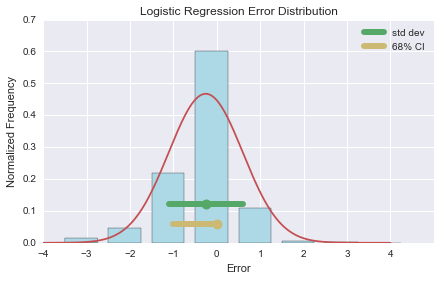

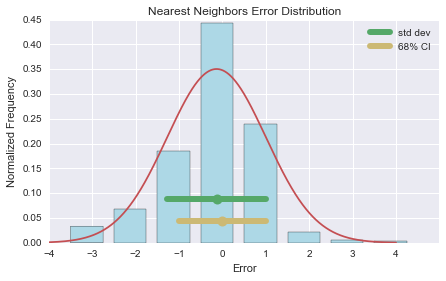

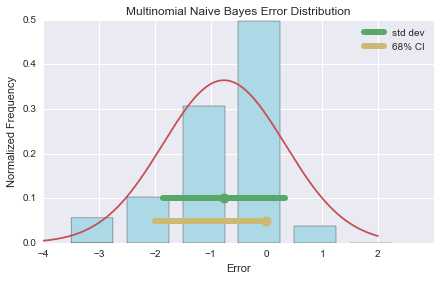

In [157]:
for model, val in NBModel.iteritems():
    plt.rc('figure', figsize=(7,4))
    y_predicted = val['y_predicted']
    
    test_df = pd.DataFrame(y_predicted, columns=['predicted_rating'])
    test_df['rating'] = TFIDF_Y_test

    test_df['error'] = test_df.rating - test_df.predicted_rating
    plot_error_dist(test_df.error, model)

LDA Model


To reduce processing of redundant information that i did on term frequency method, by using topic modeling to extract major topics in a review and using that as features

In [158]:
topics = list(topicDist_allStars_train.columns[:numTopics])
print topics

['Topic1', 'Topic2', 'Topic3', 'Topic4', 'Topic5', 'Topic6', 'Topic7', 'Topic8', 'Topic9', 'Topic10', 'Topic11', 'Topic12', 'Topic13', 'Topic14', 'Topic15']


In [160]:
x_train = topicDist_allStars_train[topics]
y_train = topicDist_allStars_train['Star']

x_test = topicDist_allStars_test[topics]
y_test = topicDist_allStars_test['Star'] 

clfs = [KNeighborsClassifier(), MultinomialNB(), LogisticRegression(), LDA(), QDA(), RandomForestClassifier(n_estimators=100, n_jobs=2), AdaBoostClassifier(n_estimators=100)]
clf_names = ['Nearest Neighbors', 'Multinomial Naive Bayes', 'Logistic Regression', 'LDA', 'QDA', 'Random Forest', 'AdaBoost']

LDAModel = {}
for (i, clf_) in enumerate(clfs):
    clf = clf_.fit(x_train, y_train)
    preds = clf.predict(x_test)
    
    precision = metrics.precision_score(y_test, preds)
    recall = metrics.recall_score(y_test, preds)
    f1 = metrics.f1_score(y_test, preds)
    accuracy = accuracy_score(y_test, preds)
    report = classification_report(y_test, preds)
    matrix = metrics.confusion_matrix(y_test, preds, labels=SG.groups.keys())
    
    data = {'precision':precision,
            'recall':recall,
            'f1_score':f1,
            'accuracy':accuracy,
            'clf_report':report,
            'clf_matrix':matrix,
            'y_predicted':preds}
    
    LDAModel[clf_names[i]] = data
cols = ['precision', 'recall', 'f1_score', 'accuracy']
pd.DataFrame(LDAModel).T[cols].T

,AdaBoost,LDA,Logistic Regression,Multinomial Naive Bayes,Nearest Neighbors,QDA,Random Forest
precision,0.359739,0.302586,0.305603,0.166552,0.325767,0.343105,0.329964
recall,0.3892,0.412274,0.415158,0.408108,0.328954,0.349143,0.36837
f1_score,0.340219,0.328156,0.307074,0.236561,0.325725,0.309581,0.333963
accuracy,0.3892,0.412274,0.415158,0.408108,0.328954,0.349143,0.36837


In [161]:
for model, val in LDAModel.iteritems():
    print '-------'+'-'*len(model)
    print 'MODEL:', model
    print '-------'+'-'*len(model)
    print 'The precision for this classifier is ' + str(val['precision'])
    print 'The recall for this classifier is    ' + str(val['recall'])
    print 'The f1 for this classifier is        ' + str(val['f1_score'])
    print 'The accuracy for this classifier is  ' + str(val['accuracy'])
    print 'Here is the classification report:'
    print val['clf_report']

----------
MODEL: LDA
----------
The precision for this classifier is 0.302586154488
The recall for this classifier is    0.412273674091
The f1 for this classifier is        0.328155703781
The accuracy for this classifier is  0.412273674091
Here is the classification report:
             precision    recall  f1-score   support

          1       0.14      0.01      0.01       390
          2       0.00      0.00      0.00       463
          3       0.00      0.00      0.00       844
          4       0.38      0.27      0.32      1997
          5       0.42      0.79      0.55      2547

avg / total       0.30      0.41      0.33      6241

----------
MODEL: QDA
----------
The precision for this classifier is 0.343105342377
The recall for this classifier is    0.349142765582
The f1 for this classifier is        0.30958114813
The accuracy for this classifier is  0.349142765582
Here is the classification report:
             precision    recall  f1-score   support

          1       0.1

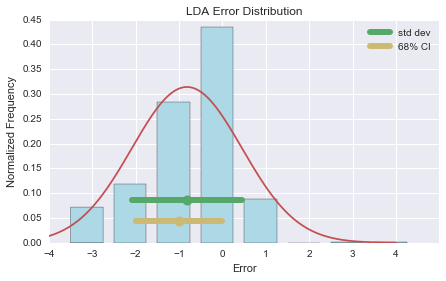

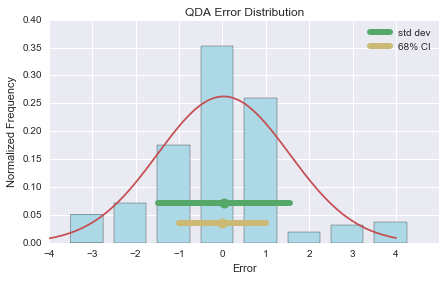

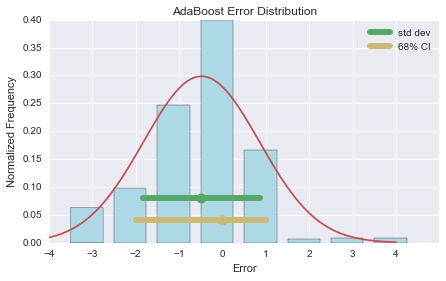

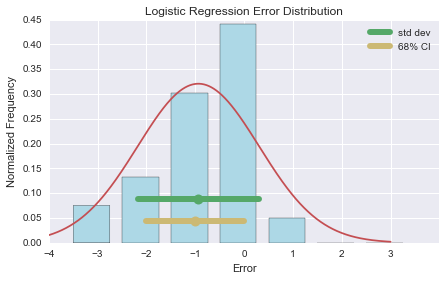

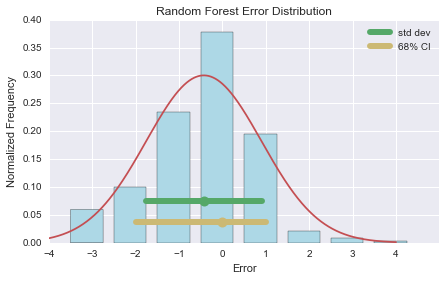

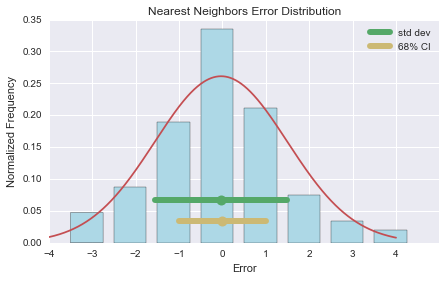

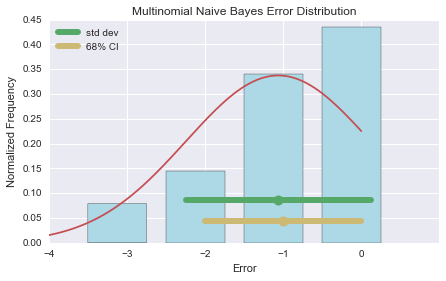

In [162]:
for model, val in LDAModel.iteritems():
    plt.rc('figure', figsize=(7,4))
    y_predicted = val['y_predicted']
    
    test_df = pd.DataFrame(y_predicted, columns=['predicted_rating'])
    test_df['rating'] = TFIDF_Y_test

    test_df['error'] = test_df.rating - test_df.predicted_rating
    plot_error_dist(test_df.error, model)

This is not giving expected accuracy because some topics, though they seem similar have different sentiments. So adding a sentimnt layer.
Sentiment Column is added using Logistic Regression

In [163]:
sentiment_X_train = vectorizer.fit_transform(star_train)
sentiment_X_test = vectorizer.transform(star_test)

sentiment_Y_train = topicDist_allStars_train['Sentiment']
sentiment_Y_test = topicDist_allStars_test['Sentiment']

senti_classifier = LogisticRegression().fit(sentiment_X_train, sentiment_Y_train)

ySentimentTrain = senti_classifier.predict(sentiment_X_train)
ySentimentTest = senti_classifier.predict(sentiment_X_test)

topicDist_allStars_train['Sentiment_Predicted'] = ySentimentTrain
topicDist_allStars_test['Sentiment_Predicted'] = ySentimentTest

In [164]:
clfs = [KNeighborsClassifier(), MultinomialNB(), LogisticRegression()]
clf_names = ['Nearest Neighbors', 'Multinomial Naive Bayes', 'Logistic Regression']

SentimentResults = {}
for (i, clf_) in enumerate(clfs):
    clf = clf_.fit(sentiment_X_train, sentiment_Y_train)
    preds = clf.predict(sentiment_X_test)
    
    precision = metrics.precision_score(sentiment_Y_test, preds)
    recall = metrics.recall_score(sentiment_Y_test, preds)
    f1 = metrics.f1_score(sentiment_Y_test, preds)
    accuracy = accuracy_score(sentiment_Y_test, preds)
    report = classification_report(sentiment_Y_test, preds)
    matrix = metrics.confusion_matrix(sentiment_Y_test, preds, labels=SG.groups.keys())
    
    data = {'precision':precision,
            'recall':recall,
            'f1_score':f1,
            'accuracy':accuracy,
            'clf_report':report,
            'clf_matrix':matrix,
            'y_predicted':preds}
    
    SentimentResults[clf_names[i]] = data
    
cols = ['precision', 'recall', 'f1_score', 'accuracy']
pd.DataFrame(SentimentResults).T[cols].T

,Logistic Regression,Multinomial Naive Bayes,Nearest Neighbors
precision,0.892191,0.771798,0.780613
recall,0.957967,0.997359,0.96941
f1_score,0.92391,0.8702,0.864828
accuracy,0.885115,0.783368,0.779362


In [165]:
for model, val in SentimentResults.iteritems():
    print '-------'+'-'*len(model)
    print 'MODEL:', model
    print '-------'+'-'*len(model)
    print 'The precision for this classifier is ' + str(val['precision'])
    print 'The recall for this classifier is    ' + str(val['recall'])
    print 'The f1 for this classifier is        ' + str(val['f1_score'])
    print 'The accuracy for this classifier is  ' + str(val['accuracy'])
    print 'Here is the classification report:'
    print val['clf_report']

--------------------------
MODEL: Logistic Regression
--------------------------
The precision for this classifier is 0.892191022751
The recall for this classifier is    0.957966549296
The f1 for this classifier is        0.923909582935
The accuracy for this classifier is  0.885114564974
Here is the classification report:
             precision    recall  f1-score   support

          0       0.86      0.69      0.77      1697
          1       0.89      0.96      0.92      4544

avg / total       0.88      0.89      0.88      6241

------------------------
MODEL: Nearest Neighbors
------------------------
The precision for this classifier is 0.780613149034
The recall for this classifier is    0.969410211268
The f1 for this classifier is        0.864827721606
The accuracy for this classifier is  0.779362281686
Here is the classification report:
             precision    recall  f1-score   support

          0       0.77      0.27      0.40      1697
          1       0.78      0.97    

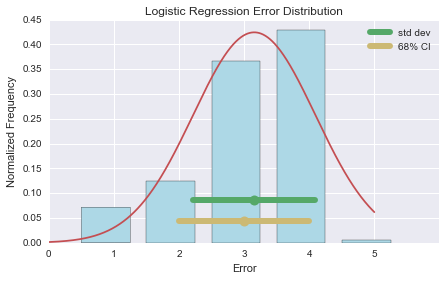

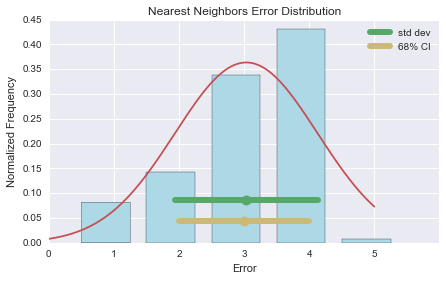

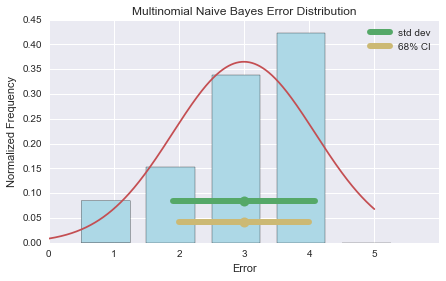

In [166]:
for model, val in SentimentResults.iteritems():
    plt.rc('figure', figsize=(7,4))
    y_predicted = val['y_predicted']
    
    test_df = pd.DataFrame(y_predicted, columns=['predicted_rating'])
    test_df['rating'] = TFIDF_Y_test

    test_df['error'] = test_df.rating - test_df.predicted_rating
    plot_error_dist(test_df.error, model)

LDA + Sentiment Model

In [183]:
topics = list(topicDist_allStars_train.columns[:numTopics])
topics.append(topicDist_allStars_train.columns[numTopics+2])
print topics

['Topic1', 'Topic2', 'Topic3', 'Topic4', 'Topic5', 'Topic6', 'Topic7', 'Topic8', 'Topic9', 'Topic10', 'Topic11', 'Topic12', 'Topic13', 'Topic14', 'Topic15', 'Sentiment_Predicted']


In [186]:
x_train = topicDist_allStars_train[topics]
y_train = topicDist_allStars_train['Star']

x_test = topicDist_allStars_test[topics]
y_test = topicDist_allStars_test['Star'] 

clfs = [KNeighborsClassifier(), MultinomialNB(), LogisticRegression(), LDA(), QDA(), RandomForestClassifier(n_estimators=100, n_jobs=2), AdaBoostClassifier(n_estimators=100)]
clf_names = ['Nearest Neighbors', 'Multinomial Naive Bayes', 'Logistic Regression', 'LDA', 'QDA', 'Random Forest', 'AdaBoost']

FinalResults = {}
for (i, clf_) in enumerate(clfs):
    clf = clf_.fit(x_train, y_train)
    preds = clf.predict(x_test)
    
    precision = metrics.precision_score(y_test, preds)
    recall = metrics.recall_score(y_test, preds)
    f1 = metrics.f1_score(y_test, preds)
    accuracy = accuracy_score(y_test, preds)
    report = classification_report(y_test, preds)
    matrix = metrics.confusion_matrix(y_test, preds, labels=SG.groups.keys())
    
    data = {'precision':precision,
            'recall':recall,
            'f1_score':f1,
            'accuracy':accuracy,
            'clf_report':report,
            'clf_matrix':matrix,
            'y_predicted':preds}
    
    FinalResults[clf_names[i]] = data
cols = ['precision', 'recall', 'f1_score', 'accuracy']
pd.DataFrame(FinalResults).T[cols].T

,AdaBoost,LDA,Logistic Regression,Multinomial Naive Bayes,Nearest Neighbors,QDA,Random Forest
precision,0.445903,0.5371,0.466422,0.166552,0.421295,0.460697,0.432767
recall,0.456337,0.467553,0.48598,0.408108,0.422208,0.482134,0.43727
f1_score,0.448045,0.409387,0.404169,0.236561,0.420159,0.440121,0.433552
accuracy,0.456337,0.467553,0.48598,0.408108,0.422208,0.482134,0.43727


In [187]:
for model, val in FinalResults.iteritems():
    print '-------'+'-'*len(model)
    print 'MODEL:', model
    print '-------'+'-'*len(model)
    print 'The precision for this classifier is ' + str(val['precision'])
    print 'The recall for this classifier is    ' + str(val['recall'])
    print 'The f1 for this classifier is        ' + str(val['f1_score'])
    print 'The accuracy for this classifier is  ' + str(val['accuracy'])
    print 'Here is the classification report:'
    print val['clf_report']

----------
MODEL: LDA
----------
The precision for this classifier is 0.537099892693
The recall for this classifier is    0.467553276718
The f1 for this classifier is        0.40938663148
The accuracy for this classifier is  0.467553276718
Here is the classification report:
             precision    recall  f1-score   support

          1       0.37      0.36      0.37       390
          2       0.27      0.57      0.37       463
          3       1.00      0.00      0.00       844
          4       0.44      0.23      0.30      1997
          5       0.53      0.81      0.64      2547

avg / total       0.54      0.47      0.41      6241

----------
MODEL: QDA
----------
The precision for this classifier is 0.460697334267
The recall for this classifier is    0.482134273354
The f1 for this classifier is        0.440120970581
The accuracy for this classifier is  0.482134273354
Here is the classification report:
             precision    recall  f1-score   support

          1       0.3

Error Metrics

In [188]:
# Train Data
data_1stars_train = {"text": star1_train, "rating": stars1_labels_train}
data_1stars_train = pd.DataFrame(data_1stars_train)

data_2stars_train = {"text": star2_train, "rating": stars2_labels_train}
data_2stars_train = pd.DataFrame(data_2stars_train)

data_3stars_train = {"text": star3_train, "rating": stars3_labels_train}
data_3stars_train = pd.DataFrame(data_3stars_train)

data_4stars_train = {"text": star4_train, "rating": stars4_labels_train}
data_4stars_train = pd.DataFrame(data_4stars_train)

data_5stars_train = {"text": star5_train, "rating": stars5_labels_train}
data_5stars_train = pd.DataFrame(data_5stars_train)

# Test Data
data_1stars_test = {"text": star1_test, "rating": star1_labels_test}
data_1stars_test = pd.DataFrame(data_1stars_test)

data_2stars_test = {"text": star2_test, "rating": star2_labels_test}
data_2stars_test = pd.DataFrame(data_2stars_test)

data_3stars_test = {"text": star3_test, "rating": star3_labels_test}
data_3stars_test = pd.DataFrame(data_3stars_test)

data_4stars_test = {"text": star4_test, "rating": star4_labels_test}
data_4stars_test = pd.DataFrame(data_4stars_test)

data_5stars_test = {"text": star5_test, "rating": star5_labels_test}
data_5stars_test = pd.DataFrame(data_5stars_test)

In [189]:
train_pieces = [data_1stars_train, data_2stars_train, data_3stars_train, data_4stars_train, data_5stars_train]
train_df = pd.concat(train_pieces, ignore_index=True)
train_df['predicted_rating'] = pd.Series('training_data', index=train_df.index)
print "Train Data", len(train_df)

test_pieces = [data_1stars_test, data_2stars_test, data_3stars_test, data_4stars_test, data_5stars_test]
test_df = pd.concat(test_pieces, ignore_index=True)
print "Test Data", len(test_df)

Train Data 24951
Test Data 6241


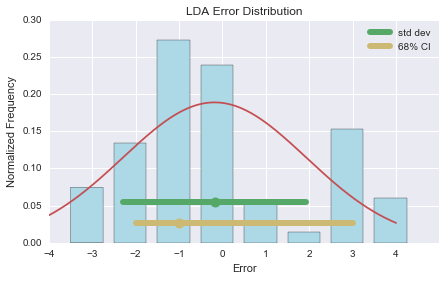

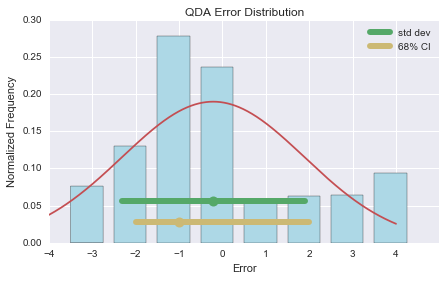

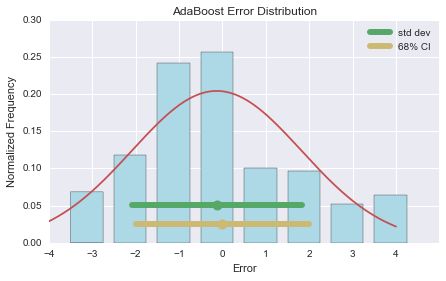

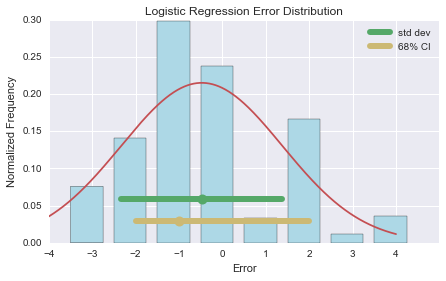

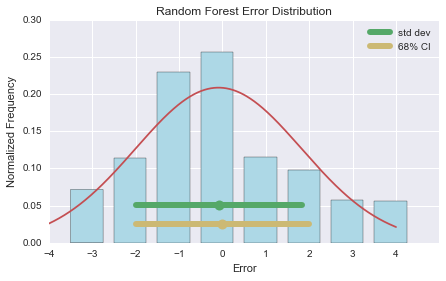

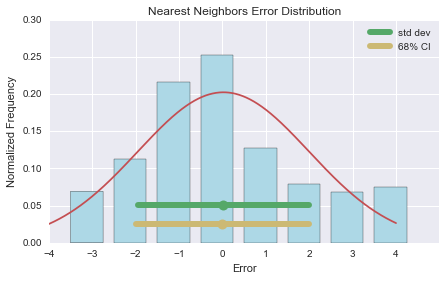

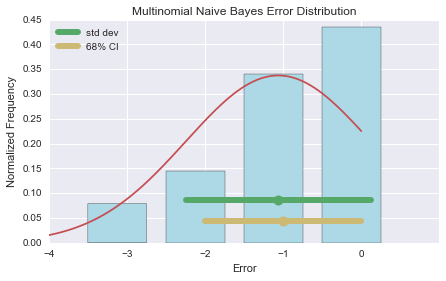

In [190]:
for model, val in FinalResults.iteritems():
    plt.rc('figure', figsize=(7,4))
    y_predicted = val['y_predicted']
    test_df['predicted_rating'] = pd.Series(y_predicted)
    pieces = [train_df, test_df]
    all_df = pd.concat(pieces, ignore_index=True)
    test_df['error'] = test_df.rating - test_df.predicted_rating
    plot_error_dist(test_df.error, model)

In [192]:
trainDF = restaurantsDF
trainLabel = trainDF.stars_review
trainDocuments = trainDF.text.tolist()

In [195]:
vectorizer = text.CountVectorizer(stop_words='english', min_df=2)

In [196]:
trainVectors = vectorizer.fit_transform(trainDocuments).toarray()

In [197]:
vocab = np.array(vectorizer.get_feature_names())

In [198]:
vocab[:50]

array([u'00', u'000', u'00am', u'00pm', u'03', u'04', u'05', u'06', u'07',
       u'08', u'09', u'10', u'100', u'1000', u'101', u'1030', u'105',
       u'10am', u'10min', u'10mins', u'10oz', u'10pm', u'10th', u'10x',
       u'11', u'110', u'1100', u'115', u'11am', u'11pm', u'12', u'120',
       u'1200', u'1230', u'125', u'12oz', u'12pm', u'13', u'130', u'14',
       u'140', u'1400', u'144', u'14oz', u'15', u'150', u'1500', u'15am',
       u'15min', u'15mins'], 
      dtype='<U18')

In [199]:
trainVectors.shape

(31192L, 13080L)

In [200]:
len(vocab)

13080

By analogy with LDA, using NMF to get a document-topic matrix (topics here will also be referred to as “components”) and a list of top words for each topic. Making analogy clear by using the same variable names: doctopic and topic_words

In [201]:
num_topics = 20
num_top_words = 20

In [202]:
clf = decomposition.NMF(n_components=num_topics, random_state=1)

In [203]:
trainTopics = clf.fit_transform(trainVectors)

Scaling the document matrix such that the component values associated with each document sum to one for analysis and visualization of NFM components similar to that of LDA's topic proportions.

In [204]:
trainTopics = trainTopics / np.sum(trainTopics, axis=1, keepdims=True)

averaging topic shares associated with the same document together.

In [209]:
D, F = trainTopics.shape
cols = ["Topic"+str(i) for i in xrange(1, F+1)]
NMFdf = pd.DataFrame(trainTopics, columns=cols)

In [210]:
NMFdf['rating'] = trainLabel.tolist()

In [211]:
NMFdf.T.head()

,0,1,2,3,4,5,6,7,8,9,...,31182,31183,31184,31185,31186,31187,31188,31189,31190,31191
Topic1,0.132350,0.183134,0.152206,0.002956,0.093372,0.208299,0.150239,0.280760,0.000000,0.275726,...,0.117990,0.000000,0.172771,0.196761,0.001829,0.006129,0.177766,0.006523,0.324109,0.132226
Topic2,0.006297,0.268206,0.005574,0.000000,0.131210,0.008077,0.000000,0.202202,0.109022,0.008345,...,0.000000,0.005668,0.000000,0.002964,0.000000,0.000000,0.528777,0.000000,0.000000,0.193891
Topic3,0.000000,0.247330,0.200480,0.006726,0.117971,0.140778,0.203862,0.007190,0.102566,0.018771,...,0.164513,0.012205,0.000000,0.000000,0.002128,0.177376,0.000000,0.007094,0.000000,0.177201
Topic4,0.163733,0.000000,0.184946,0.149700,0.333348,0.129576,0.382207,0.341828,0.101163,0.035684,...,0.143596,0.007872,0.000870,0.000000,0.000000,0.000000,0.005241,0.000000,0.387243,0.165108
Topic5,0.177050,0.000000,0.000000,0.005981,0.000445,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.026477,0.017515,0.005420,0.000000,0.000000,0.000000,0.000000,0.000000,0.068501


In [212]:
def getSentiment(x):
    if x < 3.5:
        return 0
    else:
        return 1

In [213]:
NMFdf['Sentiment'] = NMFdf['rating'].map(getSentiment)

In [216]:
nmfDF = NMFdf.dropna(how='any')

In [217]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.lda import LDA
from sklearn.qda import QDA
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

In [218]:
cols = [u'Topic1', u'Topic2', u'Topic3', u'Topic4', u'Topic5', u'Topic6', u'Topic7', u'Topic8', u'Topic9', u'Topic10', u'Topic11', u'Topic12', u'Topic13', u'Topic14', u'Topic15', u'Topic16', u'Topic17', u'Topic18', u'Topic19', u'Topic20', u'Sentiment']
Xtrain = nmfDF[:10000][cols]
Ytrain = nmfDF[:10000]['rating']
Xtest = nmfDF[10000:][cols]
Ytest = nmfDF[10000:]['rating']

In [219]:
clfs = [KNeighborsClassifier(), MultinomialNB(), LogisticRegression(), LDA(), QDA(), RandomForestClassifier(n_estimators=100, n_jobs=2), AdaBoostClassifier(n_estimators=100)]
clf_names = ['Nearest Neighbors', 'Multinomial Naive Bayes', 'Logistic Regression', 'LDA', 'QDA', 'Random Forest', 'AdaBoost']
results = {}
for (i, clf_) in enumerate(clfs):
    clf = clf_.fit(Xtrain, Ytrain)
    preds = clf.predict(Xtest)
    
    precision = metrics.precision_score(Ytest, preds)
    recall = metrics.recall_score(Ytest, preds)
    f1 = metrics.f1_score(Ytest, preds)
    accuracy = accuracy_score(Ytest, preds)
    report = classification_report(Ytest, preds)
    matrix = metrics.confusion_matrix(Ytest, preds, labels=[1, 2, 3, 4, 5])
    
    data = {'precision':precision,
            'recall':recall,
            'f1_score':f1,
            'accuracy':accuracy,
            'clf_report':report,
            'clf_matrix':matrix,
            'y_predicted':preds}
    
    results[clf_names[i]] = data

cols = ['precision', 'recall', 'f1_score', 'accuracy']
pd.DataFrame(results).T[cols].T

,AdaBoost,LDA,Logistic Regression,Multinomial Naive Bayes,Nearest Neighbors,QDA,Random Forest
precision,0.591026,0.430413,0.591479,0.388194,0.546999,0.00401651,0.606388
recall,0.603322,0.460526,0.610118,0.430985,0.546977,0.063376,0.620358
f1_score,0.591818,0.432728,0.586004,0.306649,0.545579,0.00755427,0.606089
accuracy,0.603322,0.460526,0.610118,0.430985,0.546977,0.063376,0.620358


In [220]:
for model, val in results.iteritems():
    print '-------'+'-'*len(model)
    print 'MODEL:', model
    print '-------'+'-'*len(model)
    print 'The precision for this classifier is ' + str(val['precision'])
    print 'The recall for this classifier is    ' + str(val['recall'])
    print 'The f1 for this classifier is        ' + str(val['f1_score'])
    print 'The accuracy for this classifier is  ' + str(val['accuracy'])
    print 'Here is the classification report:'
    print val['clf_report']

----------
MODEL: LDA
----------
The precision for this classifier is 0.430413438683
The recall for this classifier is    0.46052569487
The f1 for this classifier is        0.432727711395
The accuracy for this classifier is  0.46052569487
Here is the classification report:
             precision    recall  f1-score   support

        1.0       0.19      0.28      0.22      1343
        2.0       0.22      0.08      0.12      1619
        3.0       0.28      0.09      0.13      2919
        4.0       0.42      0.44      0.43      6721
        5.0       0.57      0.70      0.63      8589

avg / total       0.43      0.46      0.43     21191

----------
MODEL: QDA
----------
The precision for this classifier is 0.00401651249517
The recall for this classifier is    0.0633759614931
The f1 for this classifier is        0.00755426611212
The accuracy for this classifier is  0.0633759614931
Here is the classification report:
             precision    recall  f1-score   support

        1.0     

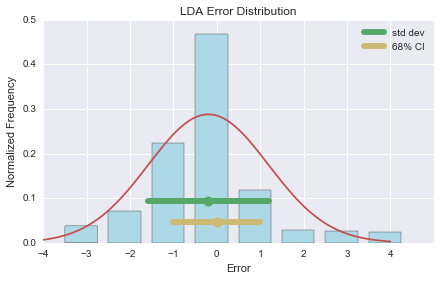

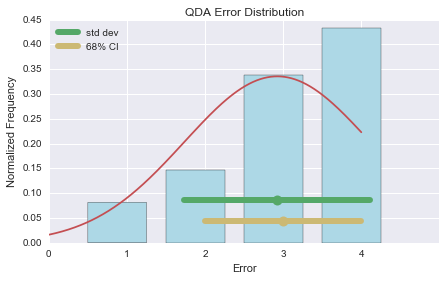

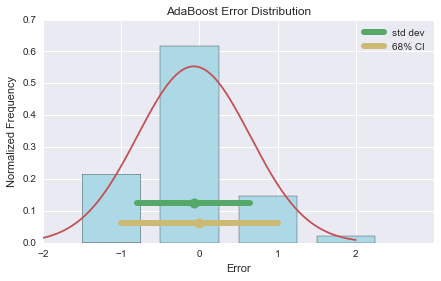

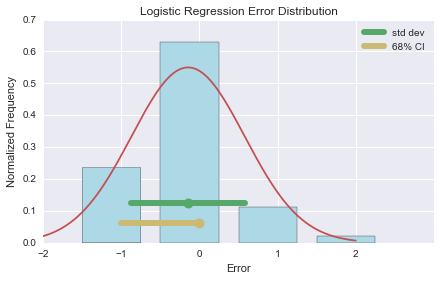

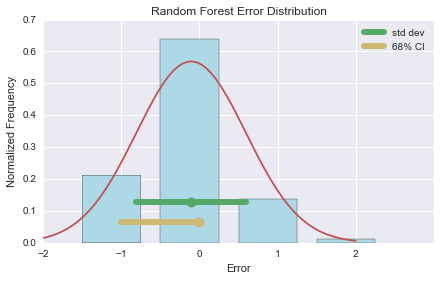

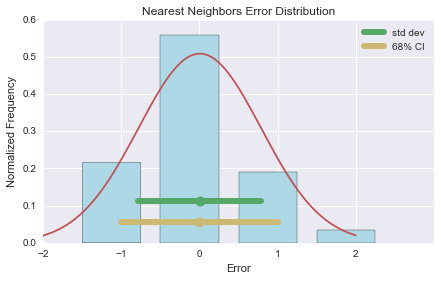

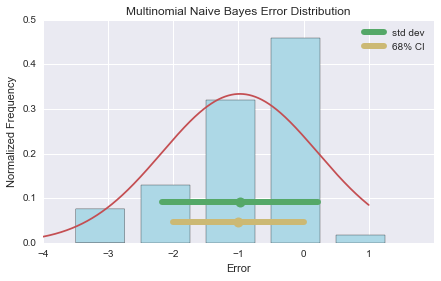

In [221]:
for model, val in results.iteritems():
    plt.rc('figure', figsize=(7,4))
    Xtest['predicted_rating'] = val['y_predicted']
    Xtest['rating'] = Ytest
    Xtest['error'] = Xtest.rating - Xtest.predicted_rating
    plot_error_dist(Xtest.error, model)